# Held-Suarez demo
-----------------------

The Held-Suarez (Held and Suarez (1994)) test case is one of the most famous test cases to study the long-term
behaviour (i.e, the climate) of a dynamical core. 

The test consists of relaxing the temperature field to a prescribed profile which supports
a circulation similar to the general circulation of the earth's atmosphere, and generating
a steady state by removing energy by friction on the winds at the planet's surface.

Lats, lons, levs, trunc, dims, tracers 62 128 28 40 861 1
in Grid init. Shape of  gfs_dynamics  is  (128, 62, 28)
(128, 62, 28)  is the shape
in Grid init. Shape of  held_suarez_forcing  is  (128, 62, 28)
(128, 62, 28)  is the shape
Num Steps:  96000
gfs_dynamics  can integrate  ['U', 'V', 'T', 'q', 'ps']
All fields integrated by federation members:  ['U', 'V', 'T', 'q', 'ps']
All fields returned by federation members:  ['U', 'V', 'T', 'q', 'ps', 'p', 'pint']
in Grid init. Shape of  federation  is  (128, 62, 28)
(128, 62, 28)  is the shape
 Wrote to file HS.nc, time=   0.00000 days


<IPython.core.display.Javascript object>


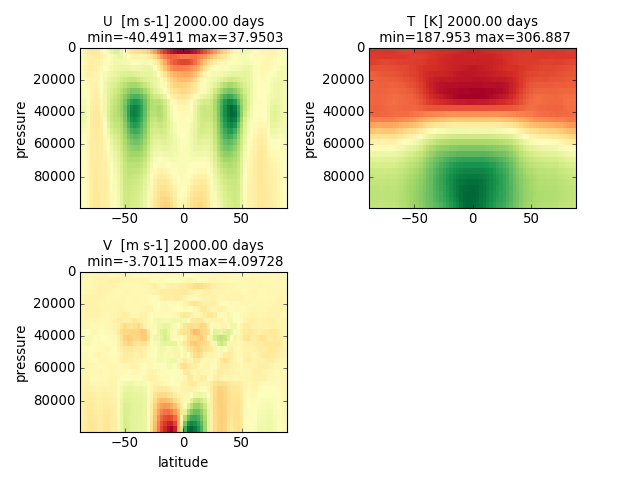

 Wrote to file HS.nc, time=  30.00000 days
 Wrote to file HS.nc, time=  60.00000 days
 Wrote to file HS.nc, time=  90.00000 days
 Wrote to file HS.nc, time= 120.00000 days
 Wrote to file HS.nc, time= 150.00000 days
 Wrote to file HS.nc, time= 180.00000 days
 Wrote to file HS.nc, time= 210.00000 days
 Wrote to file HS.nc, time= 240.00000 days
 Wrote to file HS.nc, time= 270.00000 days
 Wrote to file HS.nc, time= 300.00000 days
 Wrote to file HS.nc, time= 330.00000 days
 Wrote to file HS.nc, time= 360.00000 days
 Wrote to file HS.nc, time= 390.00000 days
 Wrote to file HS.nc, time= 420.00000 days
 Wrote to file HS.nc, time= 450.00000 days
 Wrote to file HS.nc, time= 480.00000 days
 Wrote to file HS.nc, time= 510.00000 days
 Wrote to file HS.nc, time= 540.00000 days
 Wrote to file HS.nc, time= 570.00000 days
 Wrote to file HS.nc, time= 600.00000 days
 Wrote to file HS.nc, time= 630.00000 days
 Wrote to file HS.nc, time= 660.00000 days
 Wrote to file HS.nc, time= 690.00000 days
 Wrote to f

In [2]:
%matplotlib notebook

from climt.held_suarez import held_suarez
from climt.dynamics import dynamics
from climt.federation import federation
import numpy as np

#Dynamical core Parameters
timestep = 1800.
kwargs = {}
kwargs['dt'] = timestep
kwargs['nlon'] = 128
kwargs['nlat'] = 62

dycore = dynamics(scheme='gfs', **kwargs)

kwargs = {}
kwargs['dt'] = timestep

lons,lats,levs = dycore.Grid.Shape3D

nlons = np.linspace(0,360,lons)
nlevs = np.linspace(100000, 20, levs)

kwargs['latitudes'] = dycore.latitudes
kwargs['lat'] = dycore.latitudes
kwargs['lon'] = nlons
kwargs['lev'] = nlevs
kwargs['ps'] = dycore.State.Now['ps']
kwargs['p'] = dycore.State.Now['p']

hs = held_suarez(**kwargs)

nhours = 2000*24.
nsteps = int((nhours*3600)/kwargs['dt'])
print 'Num Steps: ', nsteps

kwargs = {}
kwargs['dt'] = timestep
kwargs['p'] = dycore['p']
kwargs['U'] = dycore['U']
kwargs['V'] = dycore['V']
kwargs['T'] = dycore['T']
kwargs['ps'] = dycore['ps']
kwargs['MonitorFields'] = ['U', 'T', 'V']
kwargs['MonitorFreq'] = 3600.*12
kwargs['OutputFile'] = 'HS.nc'
kwargs['OutputFreq'] = 86400*30.
kwargs['OutputFields'] = ['U','T']

fed = federation(dycore, hs, **kwargs)

for i in range(nsteps):
    fed.step()

del(fed)
del(dycore)